In [109]:
import tensorflow as tf
import os
import shutil
import pandas as pd
import numpy as np
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt 
import seaborn as sns
import scikitplot as skplt
import sklearn
np.random.seed(42)

In [110]:
tf.__version__

'2.10.0'

In [111]:
shutil.copy("../Data/cAb-rep/cAb-Rep_heavy.nt.fasta", "../Data/cAb-rep/cAb-Rep_heavy.nt.txt")

'../Data/cAb-rep/cAb-Rep_heavy.nt.txt'

In [112]:
with open("../Data/cAb-rep/cAb-Rep_heavy.nt.txt") as myfile:
    head = [next(myfile) for x in range(2000)]
print(head[1])

AACCTACTGGAGTCTGGGGGAGGCTTAGTCAAGCCAGGAGGGTCCCTGAGACTGTCTTGTGAAGGCTCAGGATTCCTGTTCAGTCACTATTACATGAGTTGGATACGCCAGGGTCCCGAGAAGAGACTGGAGTTGGTTGCATACATTAGCTCCAATAGTACCGCCTTTTATTACGCAGACTCTGTGAAGGGCCGCTTCACCGTTTCCAAGGACGACGCCAAGAAGTCTGTGTTTCTCCAAATGACTTCCGTGTCAAGCGACGACACGGCCACCTATTACTGTGCGACGGGGGATTGGAGTCGTACCAATAACTTCGACACCTGGGGCCAGGGAACCCAGGTCATCGTCTCC



In [113]:
healthy_sequences = []
for i in head:
    if i.find("cdr3_aa_seq=") == -1:
        continue
    inner_str = i.split('cdr3_aa_seq=')[-1].split('size=')[0]
    healthy_sequences.append(inner_str)

In [114]:
df = pd.read_csv("../Data/CoV-AbDab_031022.csv")
df = df[["CDRH3"]]
df = df.head(1000)
df

,CDRH3
0,ARGQLGPWVGVDY
1,ARQGWLRGNFDY
2,ASQLWLRGAFDI
3,ARKGWLRGAFDI
4,ARKGWLRGAFDI
...,...
995,ARDLGPYGMDV
996,ARDLGAYGMDV
997,ARLPYGMDV
998,ARLPYGMDV


In [115]:
covid_sequences = df.to_numpy()
covid_sequences = np.squeeze(covid_sequences)
# print(healthy_sequences)
print(len(max(healthy_sequences, key=len)))
print(len(max(covid_sequences, key=len)))
# print(covid_sequences)

28
28


In [116]:
# order from https://www.ncbi.nlm.nih.gov/Class/MLACourse/Modules/MolBioReview/iupac_aa_abbreviations.html

In [117]:
covid_onehot = []
healthy_onehot = []

order = "ARNDCQEGHILKMFPSTWYV"

for i in covid_sequences:
    count = 0
    b = np.zeros((28, 20))
    for j in i:
        b[count, order.index(j)] = 1
        count+=1
    covid_onehot.append(b)

# print(covid_onehot)

unique_aa = []

for i in healthy_sequences:
    i = i.strip()
    count = 0
    b = np.zeros((28, 20))
    unique_aa = list(set(i)) + list(set(unique_aa))
    for j in i:
        b[count, order.index(j)] = 1
        count+=1
    healthy_onehot.append(b)
    
# print(set(unique_aa))

# print(healthy_onehot)

print(len(covid_onehot))

# set infected 1, healthy 0

1000


In [118]:
healthy_lables = [0] * 1000
covid_lables = [1] * 1000

In [119]:
X = np.concatenate((healthy_onehot, covid_onehot))
y = np.concatenate((healthy_lables, covid_lables))

In [120]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42)
    
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.1, random_state=42)

In [121]:
model = tf.keras.models.Sequential([
  tf.keras.layers.Flatten(input_shape=(28, 20)),
  tf.keras.layers.Dense(256, activation='relu'),
  tf.keras.layers.Dense(128, activation='relu'),
  tf.keras.layers.Dense(64, activation='relu'),
  tf.keras.layers.Dense(16, activation='relu'),
  tf.keras.layers.Dense(4, activation='relu'),
  # tf.keras.layers.Dropout(0.4),
  tf.keras.layers.Dense(1, activation='sigmoid')
])

In [122]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.binary_crossentropy,
              metrics=['accuracy'])

In [123]:
history = model.fit(X_train, y_train, epochs=20, validation_data = (X_val, y_val))

Epoch 1/20
 1/51 [..............................] - ETA: 19s - loss: 0.6981 - accuracy: 0.5312

2022-11-20 23:05:22.650775: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


51/51 [==============================] - 1s 15ms/step - loss: 0.6741 - accuracy: 0.5580 - val_loss: 0.6366 - val_accuracy: 0.7056
Epoch 2/20
 6/51 [==>...........................] - ETA: 0s - loss: 0.6139 - accuracy: 0.7552

2022-11-20 23:05:23.445346: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


51/51 [==============================] - 1s 11ms/step - loss: 0.5734 - accuracy: 0.7463 - val_loss: 0.6020 - val_accuracy: 0.7333
Epoch 3/20
51/51 [==============================] - 0s 9ms/step - loss: 0.4786 - accuracy: 0.8389 - val_loss: 0.6771 - val_accuracy: 0.7056
Epoch 4/20
51/51 [==============================] - 1s 10ms/step - loss: 0.4078 - accuracy: 0.8901 - val_loss: 0.7162 - val_accuracy: 0.7278
Epoch 5/20
51/51 [==============================] - 0s 10ms/step - loss: 0.3768 - accuracy: 0.9093 - val_loss: 0.6813 - val_accuracy: 0.7389
Epoch 6/20
51/51 [==============================] - 0s 10ms/step - loss: 0.3482 - accuracy: 0.9278 - val_loss: 0.8658 - val_accuracy: 0.7278
Epoch 7/20
51/51 [==============================] - 0s 9ms/step - loss: 0.3314 - accuracy: 0.9364 - val_loss: 0.9920 - val_accuracy: 0.6833
Epoch 8/20
51/51 [==============================] - 0s 9ms/step - loss: 0.3255 - accuracy: 0.9377 - val_loss: 0.9825 - val_accuracy: 0.7611
Epoch 9/20
51/51 [=========

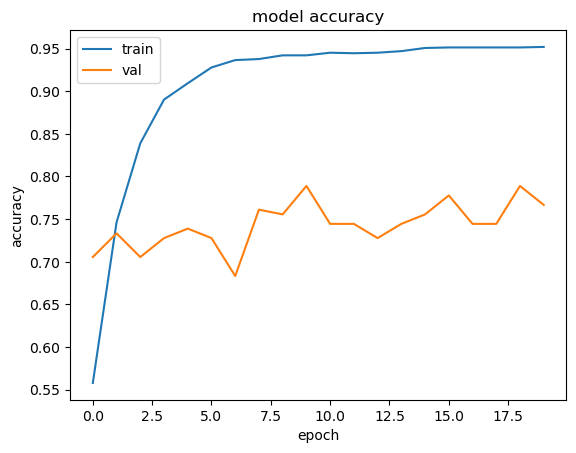

In [124]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

In [125]:
model.evaluate(X_test, y_test)

7/7 [==============================] - 0s 10ms/step - loss: 0.9140 - accuracy: 0.7800


[0.9139935374259949, 0.7799999713897705]

In [126]:
y_pred = []
y_true = y_test
# for i in X_test: print(i[:3000], "\n")

for i in X_test:
    i = np.expand_dims(i, axis=0)
    y_pred.append(np.round(model.predict(i)))

y_pred

1/1 [==============================] - 0s 13ms/step


2022-11-20 23:05:32.613528: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


1/1 [==============================] - 0s 13ms/step


[array([[0.]], dtype=float32),
 array([[1.]], dtype=float32),
 array([[1.]], dtype=float32),
 array([[0.]], dtype=float32),
 array([[1.]], dtype=float32),
 array([[1.]], dtype=float32),
 array([[1.]], dtype=float32),
 array([[0.]], dtype=float32),
 array([[0.]], dtype=float32),
 array([[1.]], dtype=float32),
 array([[0.]], dtype=float32),
 array([[0.]], dtype=float32),
 array([[1.]], dtype=float32),
 array([[1.]], dtype=float32),
 array([[0.]], dtype=float32),
 array([[0.]], dtype=float32),
 array([[0.]], dtype=float32),
 array([[0.]], dtype=float32),
 array([[1.]], dtype=float32),
 array([[1.]], dtype=float32),
 array([[1.]], dtype=float32),
 array([[1.]], dtype=float32),
 array([[1.]], dtype=float32),
 array([[0.]], dtype=float32),
 array([[0.]], dtype=float32),
 array([[1.]], dtype=float32),
 array([[0.]], dtype=float32),
 array([[0.]], dtype=float32),
 array([[0.]], dtype=float32),
 array([[0.]], dtype=float32),
 array([[0.]], dtype=float32),
 array([[0.]], dtype=float32),
 array([

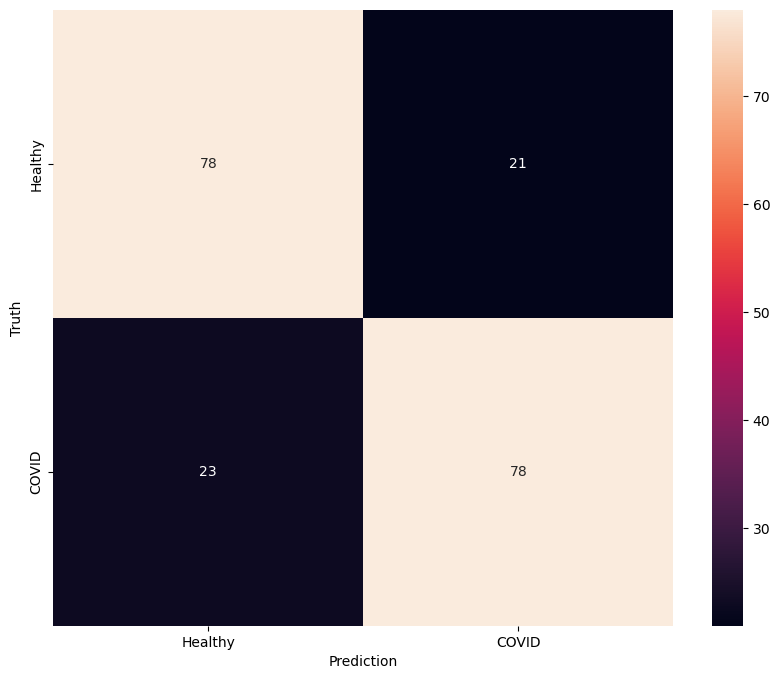

tf.Tensor(
[[78 21]
 [23 78]], shape=(2, 2), dtype=int32)


In [127]:
correct_labels = np.array(tf.concat([item for item in y_true], axis = 0))
predicted_labels = np.array(tf.concat([item for item in y_pred], axis = 0))

confusion_mtx = tf.math.confusion_matrix(correct_labels, predicted_labels)
plt.figure(figsize=(10, 8))
sns.heatmap(confusion_mtx,
            xticklabels=["Healthy", "COVID"],
            yticklabels=["Healthy", "COVID"],
            annot=True, fmt='g')
plt.xlabel('Prediction')
plt.ylabel('Truth')
plt.show()

print(confusion_mtx)

In [128]:
tf.math.confusion_matrix([0, 0, 0, 0, 0], [1, 1, 1, 1, 1]) # represents # of false positives (0 actual 1 pred)

<tf.Tensor: shape=(2, 2), dtype=int32, numpy=
array([[0, 5],
       [0, 0]], dtype=int32)>

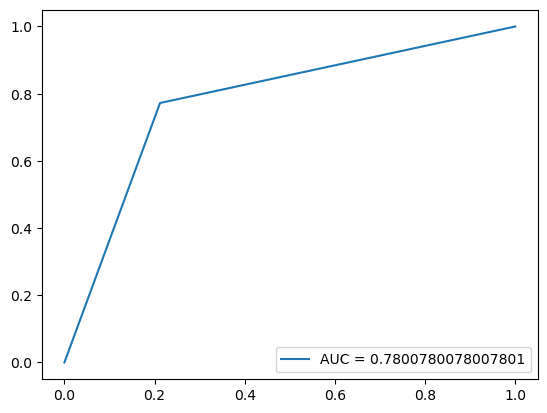

In [129]:
fpr, tpr, _ = sklearn.metrics.roc_curve(correct_labels,  predicted_labels)
auc = sklearn.metrics.roc_auc_score(correct_labels, predicted_labels)
plt.plot(fpr,tpr,label="AUC = "+str(auc))
plt.legend(loc=4)
plt.show()